# AIOKraken Tutorial
For more information, please check http://github.com/asmodehn/aiokraken


In [1]:
%pip install -e .
from aiokraken.rest.client import RestClient
from aiokraken.rest.api import Server

Obtaining file:///opt/Projects/aiokraken
  Found existing installation: aiokraken 2.0.0
    Uninstalling aiokraken-2.0.0:
      Successfully uninstalled aiokraken-2.0.0
  Running setup.py develop for aiokraken
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
kraken = RestClient(Server())

In [3]:
await kraken.time()

/0/public/Time


Tue Oct  1 15:00:31 2019

In [4]:
# polling ohlc
ohlc = await kraken.ohlc(pair='XBTEUR')
print(ohlc.head())

         time    open    high     low   close    vwap      volume  count
0  1569891660  7549.1  7549.6  7549.1  7549.3  7549.3  0.02025415      4
1  1569891720  7549.3  7549.4  7549.3  7549.3  7549.3  0.05658091      5
2  1569891780  7549.3  7549.3  7546.8  7546.8  7546.8  0.03010246      2
3  1569891840  7546.8  7546.8  7543.3  7543.3  7546.2  0.13324434      4
4  1569891900  7543.3  7543.3  7542.9  7542.9  7543.2  0.44721395      2


<Figure size 864x360 with 0 Axes>

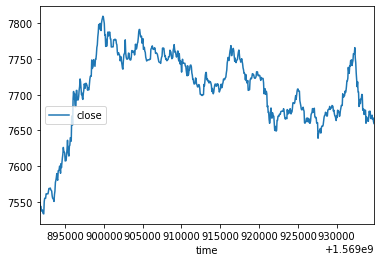

In [5]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import collections
import time
import talib
import asyncio
%matplotlib inline

# def live_plot(data_dict, figsize=(7,5), title=''):
#     clear_output(wait=True)
#     plt.figure(figsize=figsize)
#     for label,data in data_dict.items():
#         plt.plot(data, label=label)
#     plt.title(title)
#     plt.grid(True)
#     plt.xlabel('epoch')
#     plt.legend(loc='center left') # the plot evolves to the right
#     plt.show();
    
#for i in range(10):  # how to interactively stop this ?  DO we even need it ? probably not for REST interface anyway...
clear_output(wait=True)
plt.figure(figsize=(12,5))

ohlc_df = await kraken.ohlc(pair='XBTEUR') #since=ohlc.get('last'))
# convert what we want to draw to numeric to please mpl
ohlc_df.dataframe.close = pd.to_numeric(ohlc_df.dataframe.close)
#ohlc_df.time = pd.to_datetime(ohlc_df.time, unit='s')
ohlc_df.dataframe.plot(x='time', y='close') 

#testing TAlib
res = talib.MA(ohlc_df.dataframe.close)
#res.plot()

plt.legend(loc='center left') # the plot evolves to the right
plt.show()

time.sleep(10.0)
#await asyncio.sleep(10.0)  # careful with rate limits...  # asyncio sleep allows other cells to run !?

In [ ]:
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [ ]:
import time

data = collections.defaultdict(list)
for i in range(100):
    time.sleep(1.0)
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)